#### Challenge: Widgets
Recruitment task: Widgets <br/>
Company: Code Poets <br/>
Author: Jan Gruszczynski <br/>

#### Task description:
<div style="text-align: justify">
Create a basic system description and document a normalized schema from the attached widgets text file.  Include 1) what you think this system would do 2) what you feel would be a reasonable database structure for the data and a reasonable architecture for the system 3) any questions or concerns you have regarding this dataset/system that might need to be answered before establishing an ideal database/solution for such a system. </div>

#### 1. Analysis of the presented table (using Pandas library): 

In [187]:
import pandas as pd
import numpy as np

In [188]:
widgets = pd.read_csv("widgets.tsv", sep="\t")
for i in widgets.columns: 
    # Inefficient, but this is just for the analysis
    widgets[i] = widgets[i].astype(str).apply(lambda x: x.strip(" "))
widgets

,widget,packaging,customer,price,supplier,cost,warehouse,qty,min_qty
0,Ant Trap,bag of 10,Home Place,$9,Little Traps,$0.50,AUS,112,50
1,Ant Trap,bag of 5,Home Place,$5,Little Traps,$0.50,AUS,112,50
2,Ant Trap,bag of 10,Bug Store,$10,Little Traps,$0.50,AUS,112,50
3,Ant Trap,bag of 5,Bug Store,$6,Little Traps,$0.50,AUS,112,50
4,Mouse Trap,box of 2,Home Place,$5,Little Traps,$1,ATL,200,50
5,Mouse Trap,box of 1,Home Place,$3,Little Traps,$1,ATL,200,50
6,Mouse Trap,bag of 10,Home Place,$20,Little Traps,$1,ATL,200,50
7,Mouse Trap,bag of 5,Bug Store,$15,Little Traps,$1,ATL,200,50
8,Bear Trap,box of 1,Home Place,$50,Big Traps,$40,MSP,10,10
9,Bear Trap,box of 5,Home Place,$220,Big Traps,$40,MSP,10,10


In [189]:
suppliers =  widgets[['supplier']].drop_duplicates().reset_index().drop(columns=['index'])
suppliers

,supplier
0,Little Traps
1,Big Traps
2,Raytheon


In [190]:
warehouses =  widgets[['warehouse']].drop_duplicates().reset_index().drop(columns=['index'])
warehouses

,warehouse
0,AUS
1,ATL
2,MSP


In [191]:
customers =  widgets[['customer']].drop_duplicates().reset_index().drop(columns=['index'])
customers

,customer
0,Home Place
1,Bug Store
2,No Bears R Us


In [192]:
packages = widgets[['packaging']].drop_duplicates().reset_index().drop(columns=['index'])
packages

,packaging
0,bag of 10
1,bag of 5
2,box of 2
3,box of 1
4,box of 5
5,crate of 1


In [193]:
warehouses_map = warehouses.to_numpy().flatten()
warehouses_map = dict(zip(warehouses_map,list(range(len(warehouses_map)))))
suppliers_map = suppliers.to_numpy().flatten()
suppliers_map = dict(zip(suppliers_map,list(range(len(suppliers_map)))))

In [194]:
new_widgets = widgets[['widget','cost', 'warehouse', 'supplier', 'qty', 'min_qty']].drop_duplicates().reset_index(drop=True)
new_widgets['warehouse_id'] = new_widgets.warehouse.map(warehouses_map)
new_widgets['supplier_id'] = new_widgets.supplier.map(suppliers_map)
new_widgets.drop(columns=['warehouse', 'supplier'])

,widget,cost,qty,min_qty,warehouse_id,supplier_id
0,Ant Trap,$0.50,112,50,0,0
1,Mouse Trap,$1,200,50,1,0
2,Bear Trap,$40,10,10,2,1
3,Moose Trap,$50,5,5,2,1
4,Elephant Trap,$90,3,5,2,2


In [195]:
customers_map = customers.to_numpy().flatten()
customers_map = dict(zip(customers_map,list(range(len(customers_map)))))
widget_map = new_widgets.to_numpy().flatten()
widget_map = dict(zip(widget_map,list(range(len(widget_map)))))
packages_map = packages.to_numpy().flatten()
packages_map = dict(zip(packages_map,list(range(len(packages_map)))))

In [196]:
customer_package = widgets[['customer', 'widget', 'packaging', 'price']].reset_index(drop=True)
customer_package['customer_id'] = customer_orders.customer.map(customers_map)
customer_package['widget_id'] = customer_orders.widget.map(widget_map)
customer_package['package_id'] = customer_orders.packaging.map(packages_map)
customer_package.drop(columns=['widget', 'customer', 'packaging'])

,price,customer_id,widget_id,package_id
0,$9,0,0,0
1,$5,0,0,1
2,$10,1,0,0
3,$6,1,0,1
4,$5,0,8,2
5,$3,0,8,3
6,$20,0,8,0
7,$15,1,8,1
8,$50,0,16,3
9,$220,0,16,4


After the analysis I think the database schema should look in the following way:
To get to this point I made some assumptions about our data:
1. Widget can only have one minQuantity, Quantity, Cost, Supplier and Warehouse. (There is no such situation where this assumption is broken)
2. CostumerPackage has one unique price and package type. 

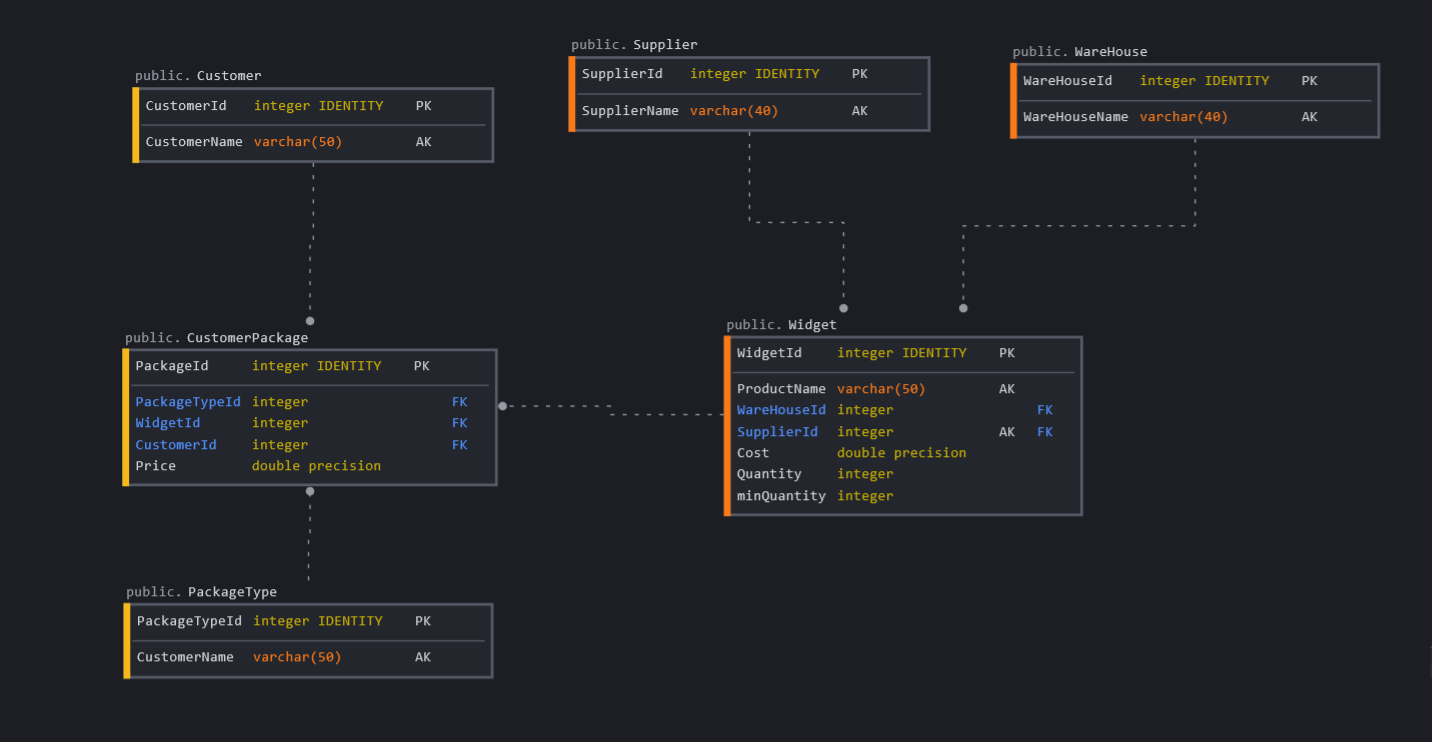

#### 2. Answers to questions: 

1. **What you think this system would do?** <br/>
<div style="text-align: justify"> I think the system is used by some kind of a producer of toy widgets.  This is probably just a small part of the whole database used for creation of customizable packages. I presume that different buyers require different types of packaging, and it is in the widget manufacturer's interest to adjust the price of a package for each company separately to maximally increase the profit. </div>
2. **What you feel would be a reasonable database structure for the data and a reasonable architecture for the system?** <br/>
<div style="text-align: justify">
In the picture above I have presented how I would design the database structure with given data. If it comes to the architecture design it all depends on the structure of the rest of the system. Firstly, I would try to adhere to the company’s design. I guess the choice here would be to create a microservice and connect it through REST API to web client gui. </div>
3. **Any questions or concerns you have regarding this dataset/system that might need to be answered before establishing an ideal database/solution for such a system.** <br/>
<div style="text-align: justify">
    
If it comes to the question about the system (order doesn't matter):
1. What is the purpose of the system? - I would try to precisely study how the system user would use it. By what division of the company is the system used? Accounting or logistics? - **Analysis of the use cases and users**.
2. What are the business needs? 
3. How is the rest of the system designed in the company? 
4. How was the system previously designed?
5. Who shall use the system? Customer, company worker?
6. Shall the system be scalable or easy and fast to develop? or both? : )
7. How much traffic and throughput shall the system be able to handle?

If it comes to the question about the dataset:
    
1. I think the most important question would be to ask, which pairs of values are unique? - Are the assumptions, made by me above,  valid?
2. What is the meaning of some feature names? For example, the fields “price” and “cost” are ambiguous. 
3. Definition of the used fields and their relation to other fields. 
</div>